### Heart Disease Detection Project

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [455]:
# helper function 

def load_data(file):
    return pd.read_csv(file)
    
def plot_feature(df,col):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(col))
    sns.distplot(df[col],hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
    plt.subplot(1,2,2)
    mean = df.groupby(col)['target'].mean()
    std = df.groupby(col)['target'].std()
    mean.plot()
    plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    plt.title('Association between Target and {}'.format(col))
    plt.ylabel('Target')
    plt.show()    
    

## Explore the Data

In [251]:
# Loading data
df = load_data('heart.csv')

##### Data contains 

##### age - age in years 
##### sex - (1 = male; 0 = female) 
##### cp - chest pain type 
##### trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
##### chol - serum cholestoral in mg/dl 
##### fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
##### restecg - resting electrocardiographic results 
##### thalach - maximum heart rate achieved 
##### exang - exercise induced angina (1 = yes; 0 = no) 
##### oldpeak - ST depression induced by exercise relative to rest 
##### slope - the slope of the peak exercise ST segment 
##### ca - number of major vessels (0-3) colored by flourosopy 
##### thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
##### target - have disease or not (1=yes, 0=no)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [253]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [254]:
print('There is {} observation and {} features'.format(df.shape[0],df.shape[1]-1))

There is 303 observation and 13 features


In [272]:
# Rename columns 
col_name = {'cp':"chest_pain",'trestbps':"rest_bp",'fbs':"bloodsugar",'restecg':"rest_ecg",'thalach':"max_heartrate",'exang':"exercise_angina",'oldpeak':"depression",'ca':"n_major_vasel"}

df.rename(columns = col_name,inplace=True)

# Get target and feature columns
target_col = df['target']
feature_col = list(df.columns[0:13])


In [264]:
# Check missing data
df.isnull().sum().any()

False

In [257]:
df.head()

,age,sex,chest_pain,rest_bp,chol,bloodsugar,rest_ecg,max_heartrate,exercise_angina,depression,slope,n_major_vasel,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<IPython.core.display.Javascript object>


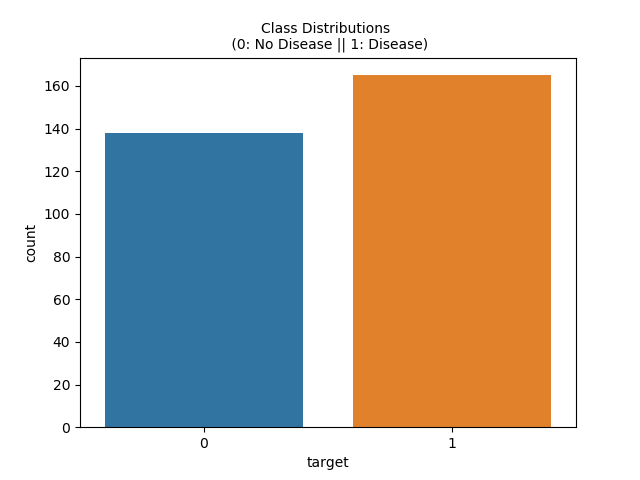

Text(0.5, 1.0, 'Class Distributions \n (0: No Disease || 1: Disease)')

In [258]:
# Check distribution of the target variable 
plt.figure()
sns.countplot(target_col)
plt.title('Class Distributions \n (0: No Disease || 1: Disease)', fontsize=10)

<IPython.core.display.Javascript object>


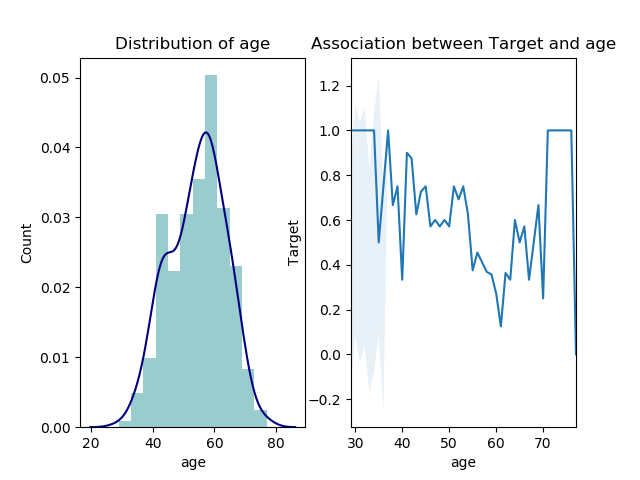

<IPython.core.display.Javascript object>


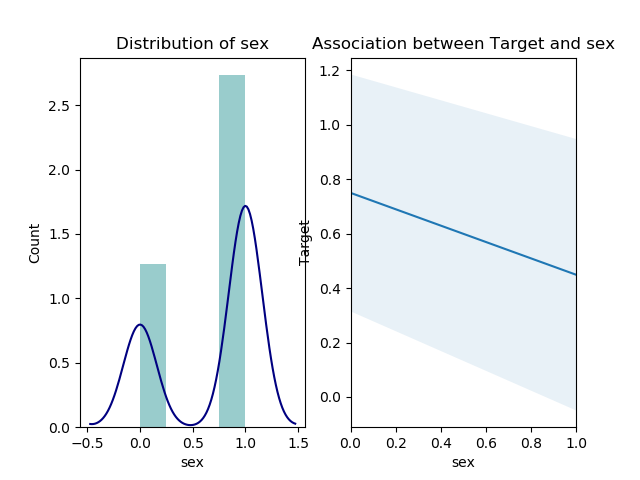

<IPython.core.display.Javascript object>


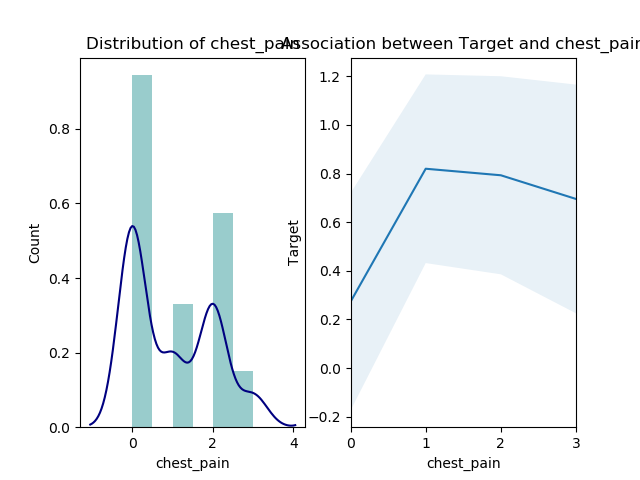

<IPython.core.display.Javascript object>


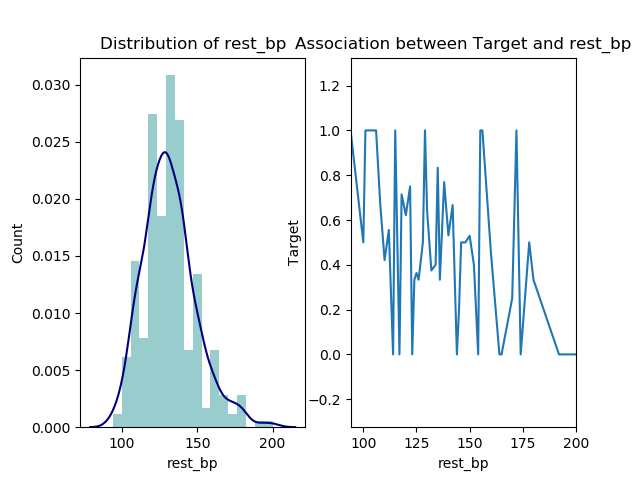

<IPython.core.display.Javascript object>


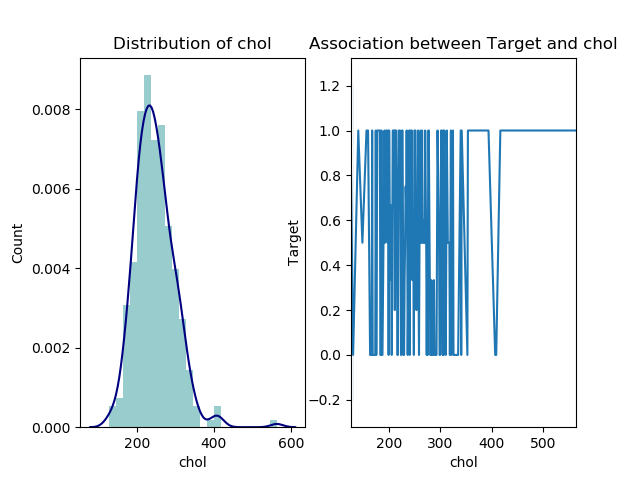

<IPython.core.display.Javascript object>


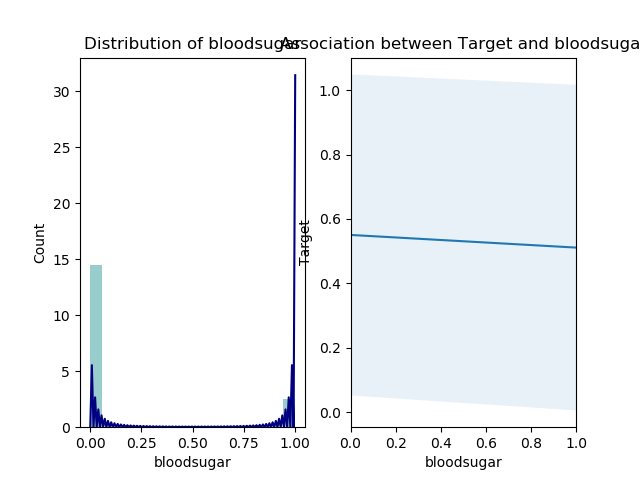

<IPython.core.display.Javascript object>


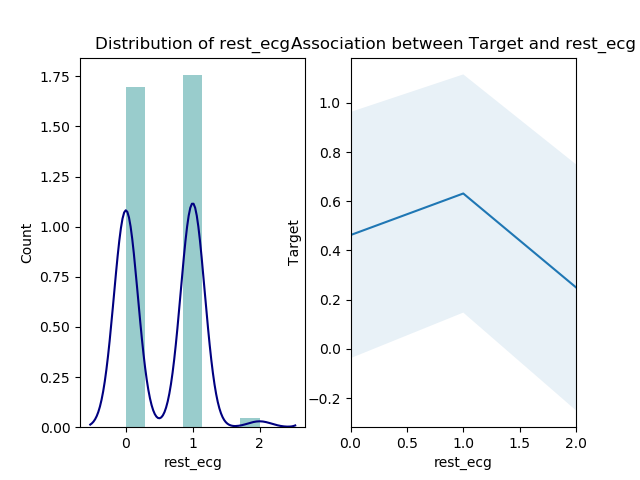

<IPython.core.display.Javascript object>


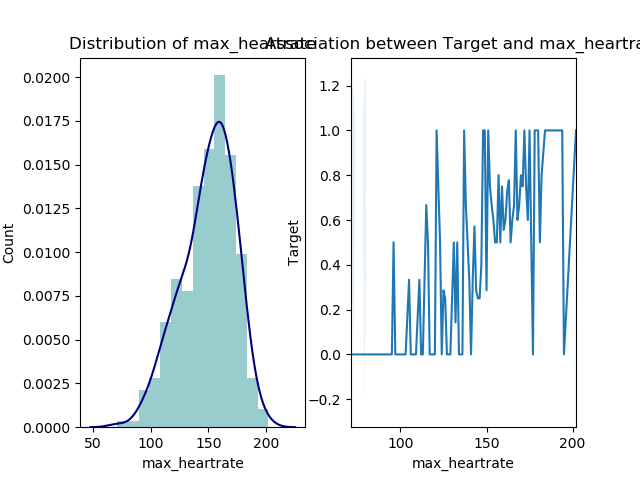

<IPython.core.display.Javascript object>


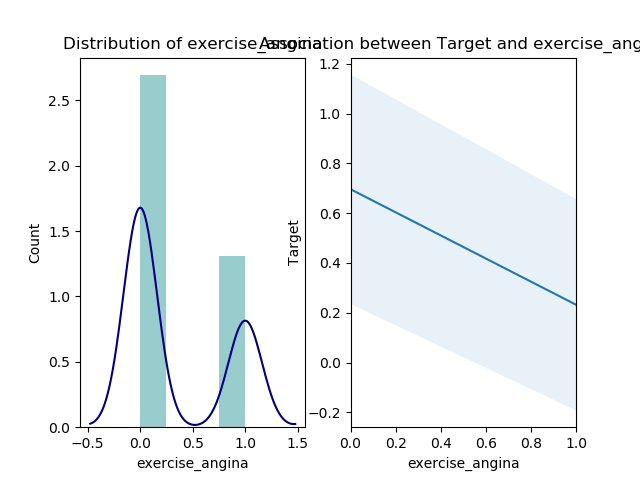

<IPython.core.display.Javascript object>


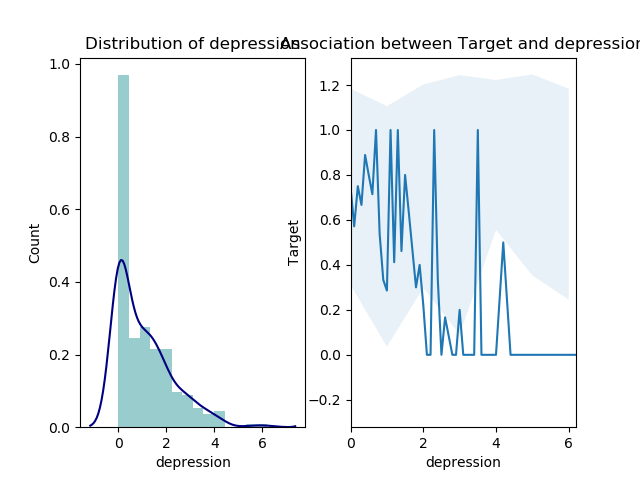

<IPython.core.display.Javascript object>


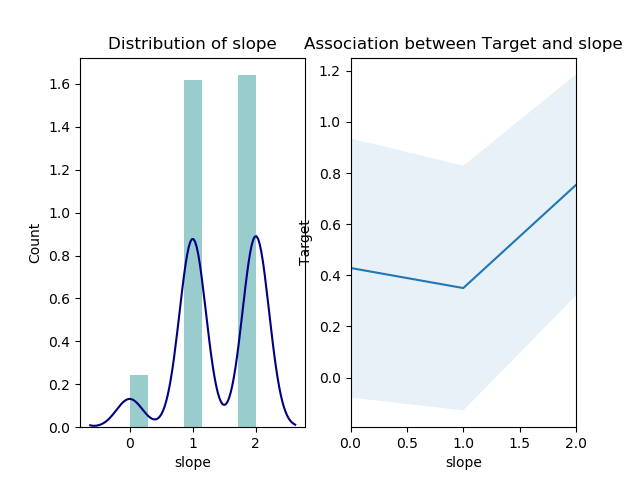

<IPython.core.display.Javascript object>


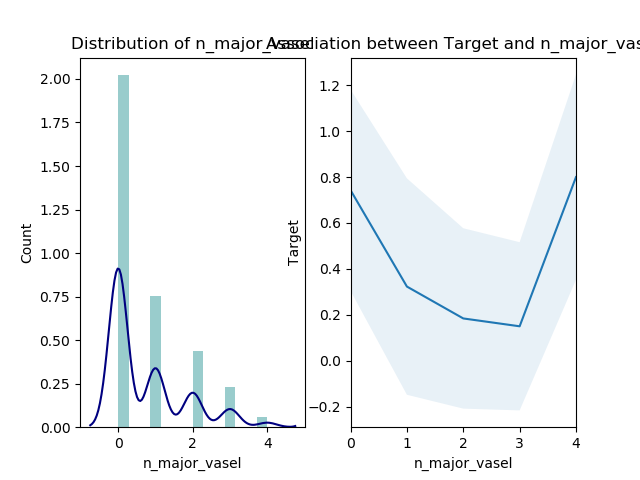

<IPython.core.display.Javascript object>


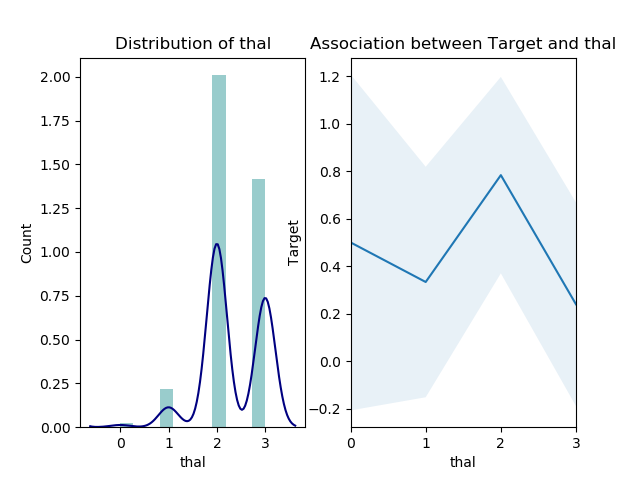

In [358]:
# Check distribution of features
for col in feature_col: 
    plot_feature(df,col)

<IPython.core.display.Javascript object>


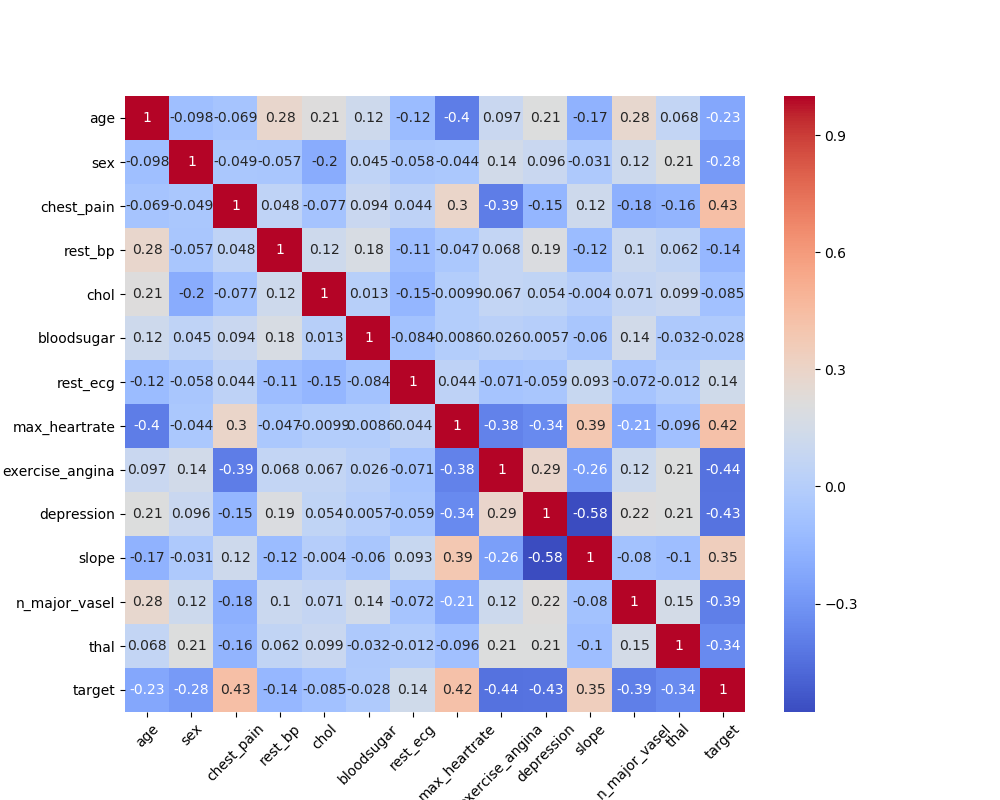

In [362]:
#look for correlation between each feature and the target
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[feature_col + ['target']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

##### From the above correlation matrix, chest_pain, max_heartrate, slope are more positively correlated with the heart disease, exercise_angina,depression,n_major_vasel, thal are more negative correlated with the heart disease.

##### Potential collinearity are slope/depression, exercise_angina/chest_pain, max_heartrate/slope 


## Model Building

#### Since the dataset is balanced and cleaned, we are going to use accuracy to evalute models performance to keep it simple.

In [214]:
## Split the dataset for training and testing
# Create array to store our features and target variable
X = df.drop('target',axis=1).values
y = df['target'].values
X_scaled = preproc.StandardScaler().fit_transform(X) # Make variables on the same scale
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42, stratify=y)


## Logistic Regression

In [285]:
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model = logistic_model.fit(X_train, y_train)

In [363]:
log_predicted = logistic_model.predict(X_test)
log_predicted[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [372]:
# Evaluate test performance
test_accuracy = logistic_model.score(X_test, y_test) 
print('test accuracy is {:.2f}%'.format(test_accuracy*100))

test accuracy is 78.69%


In [344]:
# Print Confusion Matrix
print (metrics.confusion_matrix(y_test, log_predicted))

[[19  9]
 [ 4 29]]


In [345]:
print (metrics.classification_report(y_test, log_predicted))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

   micro avg       0.79      0.79      0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



## KNN Classifier

In [220]:
# Create K values (1-10) & Create Arrays to store train/test performance accuracy
k = np.arange(1,50)
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))

for i,k in enumerate(k):
    # Instantiate NN Classifier with K Neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train, y_train)
    
    # Evaluate train performance 
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Evaluate test performance
    test_accuracy[i] = knn.score(X_test, y_test) 

<IPython.core.display.Javascript object>


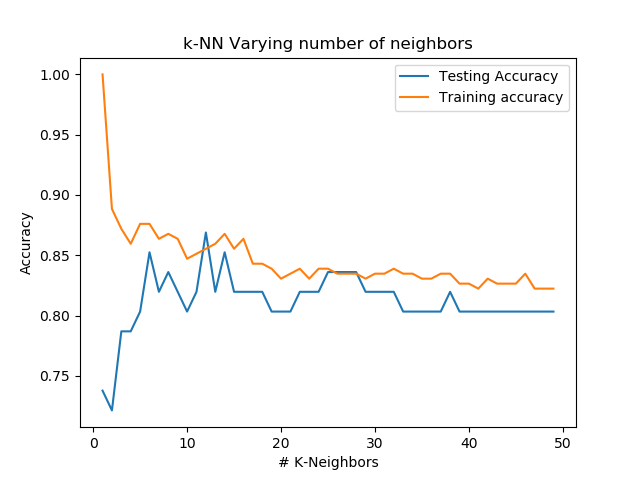

In [221]:
# Visualize Train/Test Performance
k = np.arange(1,50)
plt.title('k-NN Varying number of neighbors')
plt.plot(k, test_accuracy, label='Testing Accuracy')
plt.plot(k, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('# K-Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [330]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [369]:
print('{} has the best k and the best score is {:.2f}%'.format(knn_cv.best_params_,knn_cv.best_score_*100))

{'n_neighbors': 37} has the best k and the best score is 83.47%


## Support Vector Machine

In [408]:
# Tuning regularizatioin parameter
rp = [0.1,0.2,0.5,1,1.5,2]
train_accuracy_sv = np.empty(len(rp))
test_accuracy_sv = np.empty(len(rp))
for i,k in enumerate(rp):
    sv = SVC(kernel='rbf', C=k)
    sv.fit(X_train,y_train)
    train_accuracy_sv[i] = sv.score(X_train, y_train)
    test_accuracy_sv[i] = sv.score(X_test, y_test)
    

<IPython.core.display.Javascript object>


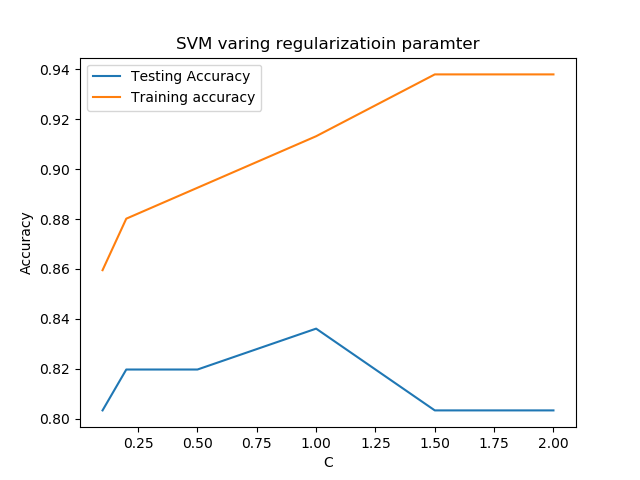

In [418]:
# Visualize train/test performance
rp = [0.1,0.2,0.5,1,1.5,2]
plt.title('SVM varing regularizatioin paramter')
plt.plot(rp, test_accuracy_sv, label='Testing Accuracy')
plt.plot(rp, train_accuracy_sv, label='Training accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

In [419]:
## Building model
sv = SVC(C=1,kernel='rbf', random_state = 40)
sv.fit(X_train, y_train) 
predicted = sv.predict(X_test)
sv_score = sv.score(X_test,y_test)

In [420]:
print('The test accuracy is {:.2f}%'.format(sv_score*100))

The test accuracy is 83.61%


### 5-fold Cross Validation

In [443]:
models = []
cv_score = {}
cv_std = {}

#define number of processes to run in parallel
num_procs = 2

In [444]:
sv_tuned = SVC(C=1,kernel='rbf', random_state = 40)
knn_tuned = KNeighborsClassifier(n_neighbors=37)
logistic_model_tuned = LogisticRegression(class_weight='balanced')

models.extend([sv_tuned,knn_tuned,logistic_model_tuned])

print("Beginning cross validation")
for model in models:
    mean_score = cross_val_score(model, X_train, y_train, cv=5)

    print(model, 'the cross validation score is {:.2f}%'.format(mean_score.mean()*100))

Beginning cross validation
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=40,
  shrinking=True, tol=0.001, verbose=False) the cross validation score is 80.61%
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=37, p=2,
           weights='uniform') the cross validation score is 83.50%
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False) the cross validation score is 83.49%


#### KNN model has the best cross validation score - 83.5% 

### Future improvement

1. Further dive into the data variables and understand the medical meaning, some categorical variables such as slope, chest pain type might not be in order, we need to create dummy variables for those.

2. Random Forest could help understand feature importance and find what really are associated with heart disease. 
3. More features could be added after gaining domain knowledge about heart disease. 
